In [11]:
import pandas as pd
import altair as alt

In [12]:
f = './data/GLB.Ts_dSST.csv'
df = pd.read_csv(f, skiprows=1)
df.columns = df.columns.get_level_values(0)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27


In [13]:
from PIL import Image

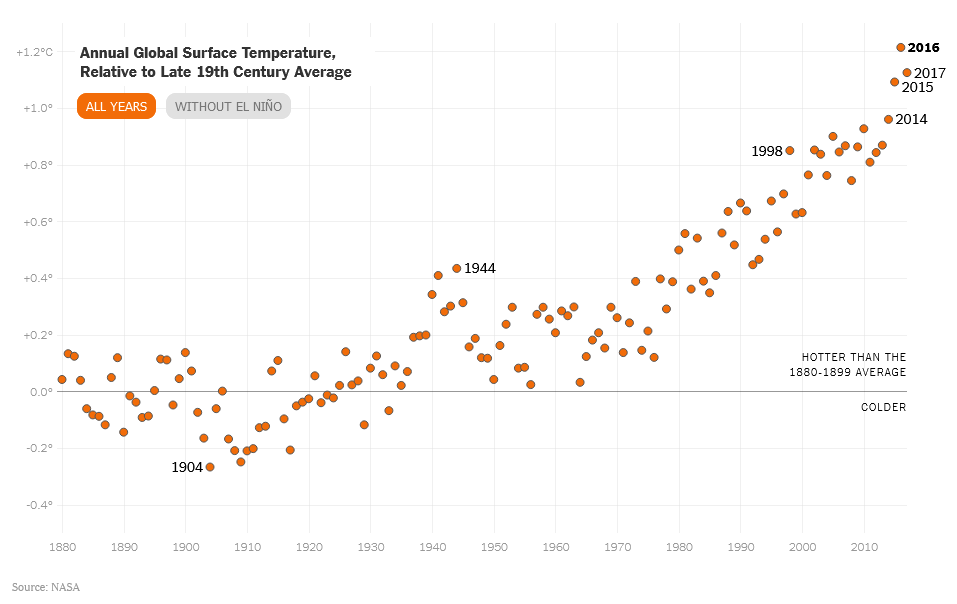

In [14]:
import IPython.display as display
from PIL import Image
display.display(Image.open('./data/nyt.png'))

In [15]:
df.dtypes

Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
J-D     float64
D-N      object
DJF      object
MAM     float64
JJA     float64
SON     float64
dtype: object

In [16]:
len(df)

138

In [17]:
df = df[['Year','J-D']]
df = df[df['Year'] >= 1880] 
df

,Year,J-D
0,1880,-0.19
1,1881,-0.10
2,1882,-0.10
3,1883,-0.19
4,1884,-0.29
...,...,...
133,2013,0.64
134,2014,0.73
135,2015,0.86
136,2016,0.99


In [18]:
df_selection = df.loc[df['Year'].isin([1904, 1944, 1998, 2014, 2015, 2016, 2017])]
df_avg_selection = df[df['Year'] <= 1899] 
df_avg_selection
df_avg = df_avg_selection['J-D'].mean()
df_avg

-0.22849999999999998

In [19]:
chart = alt.Chart(df).mark_point(filled = True,
                         size = 70,
                         color='#ff4000',
                         stroke='black',
                         
                        ).encode(
    strokeWidth=alt.StrokeWidthValue(1),
    x = alt.X(field='Year', type = 'quantitative',  title=None,
              axis = alt.Axis(
              tickCount=14
              ),
              scale = alt.Scale(
                  domain=[1880, 2017],
              )),
    y = alt.Y(field = 'J-D', type = 'quantitative', title=None,
             axis=alt.Axis(
                  tickMinStep=0.2,
             tickCount=8)),
).properties(width = 900,
            height = 500,
            title = ["Annual Global Surface Temperature","Relative to Late 19th Century Average"])

chart_selection = alt.Chart(df_selection).mark_point(
                        filled = True,
                         size = 0,
                         color='black',
                        ).encode(
    x = alt.X(field='Year', type = 'quantitative',  title=None,
              axis = alt.Axis(
              tickCount=14
              ),
              scale = alt.Scale(
                  domain=[1880, 2017],
              )),
    y = alt.Y(field = 'J-D', type = 'quantitative', title=None,
             axis=alt.Axis(
                  tickMinStep=0.2,
             tickCount=8))
)

years = chart_selection.mark_text(align="left", dx=-40, fontSize = 14).encode(
    text="Year:O")

line = alt.Chart(pd.DataFrame({'y': [df_avg]})).mark_rule().encode(y='y')

text2 = line.mark_text(
    text=['HOTTER THAN THE', '1800-1899 AVERAGE', ' ','COLDER'],
    fontSize = 12,
    dx=440,
    dy=-30,
    align='right'
).encode(
    y='y'
)

layer = alt.layer(
    chart,
    chart_selection,
    years,
    line,
    text2,
    width = 900,
    height = 500, 
    padding = 25,
).configure_axis(grid = True, gridOpacity = 0.4, domain = False, labelOpacity=0.5).configure_title(
    fontSize=16,
    fontWeight=900,
    align='left',
    anchor='start',
    font='Open Sans',
    dx=40,
    dy=60
).resolve_scale(y='shared'
)

layer

alt.LayerChart(...)